# Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('data/News_Category_Dataset_v3.json', lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [3]:
df.shape

(209527, 6)

In [4]:
df.drop(['date', 'authors', 'link'], axis=1, inplace=True)

In [5]:
df.isnull().sum()

headline             0
category             0
short_description    0
dtype: int64

In [6]:
len(df['category'].unique())

42

In [7]:
df[df['headline'].str.len() == 0]

,headline,category,short_description
90944,,POLITICS,
95567,,RELIGION,Let everyone not wrapped in tired and disprove...
103675,,WORLDPOST,
109100,,BUSINESS,
110153,,MEDIA,
122145,,QUEER VOICES,


In [8]:
df[df['short_description'].str.len() == 0]

,headline,category,short_description
20773,The Big Blue Wave,COMEDY,
21523,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,
22793,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,
32223,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,
34488,The Bechdel Test,COMEDY,
...,...,...,...
206924,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,
206939,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,
208803,Practice for International Kissing Day: 'Love ...,IMPACT,
208865,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,


In [9]:
df.drop(df[df['headline'].str.len() == 0].index, inplace=True)
df.drop(df[df['short_description'].str.len() == 0].index, inplace=True)

In [10]:
df['category'].value_counts()

POLITICS          32441
WELLNESS          17943
ENTERTAINMENT     14774
STYLE & BEAUTY     9802
TRAVEL             9421
PARENTING          8790
FOOD & DRINK       6331
QUEER VOICES       5603
HEALTHY LIVING     5265
BUSINESS           5132
COMEDY             4642
SPORTS             4414
HOME & LIVING      4317
BLACK VOICES       4177
THE WORLDPOST      3664
WEDDINGS           3653
PARENTS            3556
DIVORCE            3426
WORLD NEWS         3297
WOMEN              3184
IMPACT             3086
CRIME              2832
MEDIA              2404
WEIRD NEWS         2316
TECH               2103
GREEN              2046
TASTE              1940
RELIGION           1878
SCIENCE            1803
MONEY              1755
STYLE              1567
ENVIRONMENT        1442
U.S. NEWS          1377
ARTS & CULTURE     1339
WORLDPOST          1242
CULTURE & ARTS     1063
FIFTY              1042
GOOD NEWS          1039
LATINO VOICES      1022
COLLEGE             921
EDUCATION           902
ARTS            

In [11]:
df['category'].value_counts().values

array([32441, 17943, 14774,  9802,  9421,  8790,  6331,  5603,  5265,
        5132,  4642,  4414,  4317,  4177,  3664,  3653,  3556,  3426,
        3297,  3184,  3086,  2832,  2404,  2316,  2103,  2046,  1940,
        1878,  1803,  1755,  1567,  1442,  1377,  1339,  1242,  1063,
        1042,  1039,  1022,   921,   902,   863], dtype=int64)

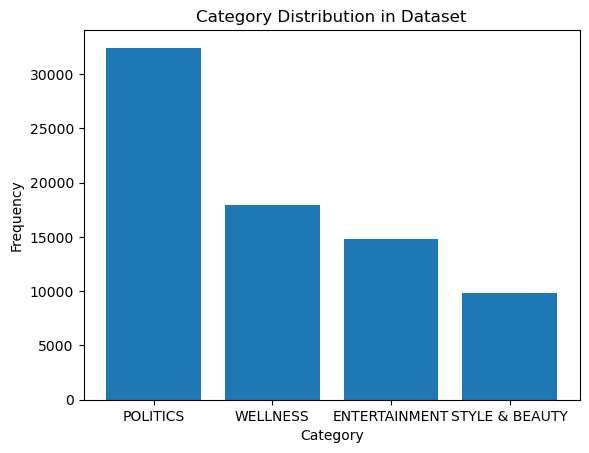

In [12]:
import matplotlib.pyplot as plt

data = df['category'].value_counts()
# print(data)

fig, ax = plt.subplots(1,1)
ax.bar(range(4), data.values[:4])
plt.xticks(range(4), data.index.values[:4])

ax.set_xlabel('Category')
ax.set_ylabel('Frequency')

ax.set_title('Category Distribution in Dataset')

plt.show()

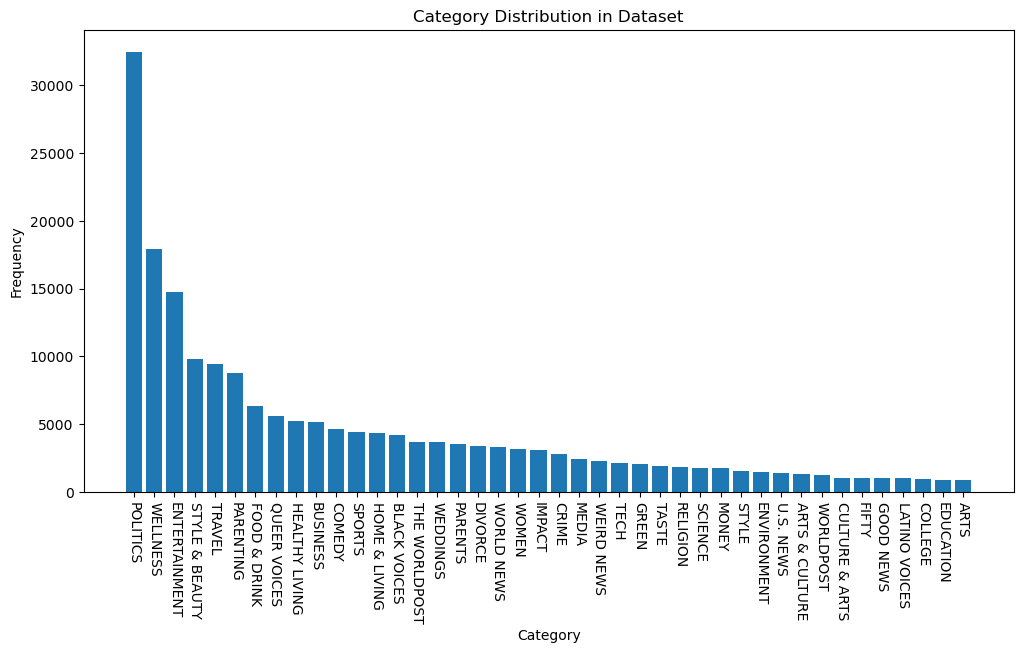

In [13]:
data = df['category'].value_counts()

fig = plt.figure(figsize=(12,6))
plt.bar(range(len(data)), data.values)


plt.xticks(range(len(data)), data.index.values, rotation=-90)

ax = plt.gca()
ax.set_xlabel('Category')
ax.set_ylabel('Frequency')

ax.set_title('Category Distribution in Dataset')

plt.show()

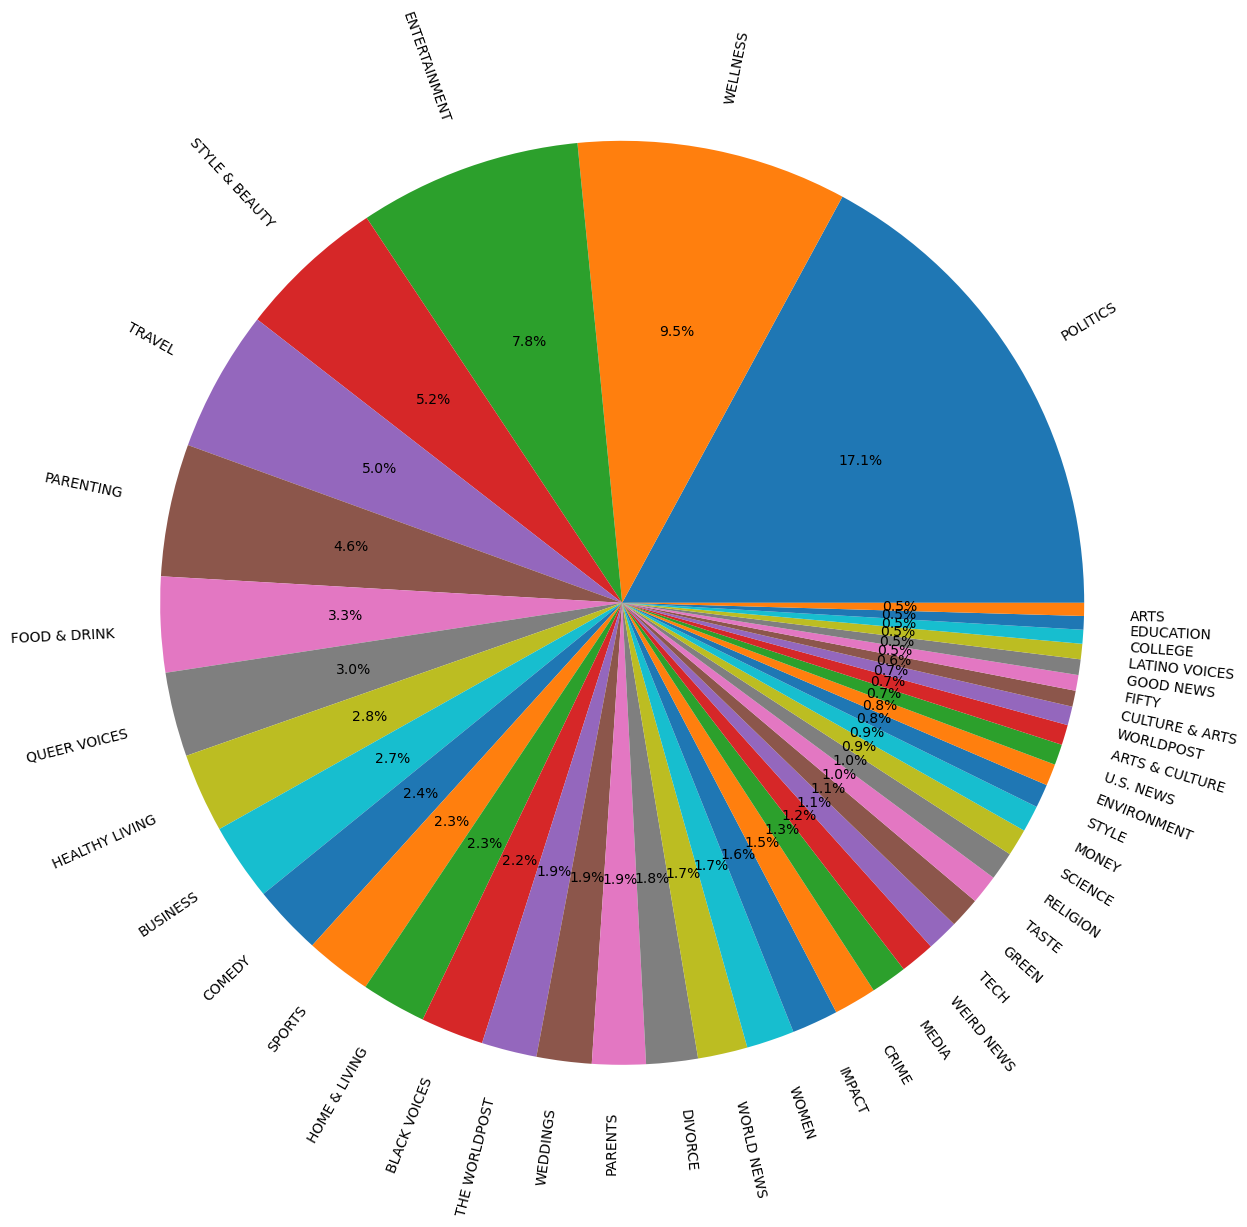

In [14]:
data = df['category'].value_counts()

fig = plt.figure(figsize=(15,15))
plt.pie(data.values, labels=data.index.values, autopct='%1.1f%%', rotatelabels=45)

ax.set_title('Category Distribution in Dataset')

plt.show()

In [15]:
data = df.copy()

def get_len(data):
    return len(data)

data['headline_len'] = data['headline'].apply(get_len)
data = data.groupby('category')['headline_len'].mean()
data

category
ARTS              49.483198
ARTS & CULTURE    65.214339
BLACK VOICES      64.635624
BUSINESS          56.106196
COLLEGE           57.306189
COMEDY            63.417923
CRIME             65.432203
CULTURE & ARTS    60.324553
DIVORCE           53.980736
EDUCATION         53.313747
ENTERTAINMENT     66.531000
ENVIRONMENT       60.139390
FIFTY             47.480806
FOOD & DRINK      47.164429
GOOD NEWS         62.796920
GREEN             57.815738
HEALTHY LIVING    51.423552
HOME & LIVING     61.631225
IMPACT            54.633506
LATINO VOICES     65.175147
MEDIA             64.185940
MONEY             55.750997
PARENTING         50.896473
PARENTS           53.766592
POLITICS          64.664005
QUEER VOICES      62.351954
RELIGION          54.181044
SCIENCE           62.936772
SPORTS            64.553919
STYLE             59.227186
STYLE & BEAUTY    64.619567
TASTE             53.594845
TECH              58.000951
THE WORLDPOST     63.591157
TRAVEL            49.767753
U.S. NEWS  

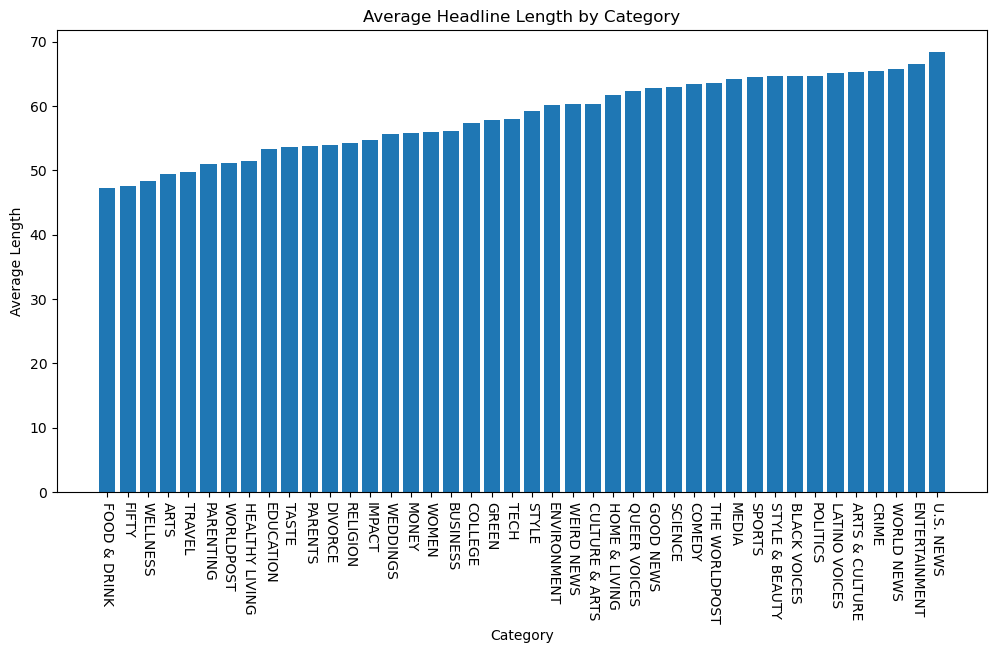

In [16]:
data = data.sort_values()

fig = plt.figure(figsize=(12,6))
plt.bar(range(len(data)), data.values)


plt.xticks(range(len(data)), data.index.values, rotation=-90)

ax = plt.gca()
ax.set_xlabel('Category')
ax.set_ylabel('Average Length')

ax.set_title('Average Headline Length by Category')

plt.show()

In [17]:
data = df.copy()

def get_len(data):
    return len(data)

data['desc_len'] = data['short_description'].apply(get_len)
data = data.groupby('category')['desc_len'].mean()
data

category
ARTS              222.962920
ARTS & CULTURE     75.916355
BLACK VOICES      109.956907
BUSINESS          153.491426
COLLEGE           164.226927
COMEDY             83.459931
CRIME             102.788842
CULTURE & ARTS    152.091251
DIVORCE           146.489492
EDUCATION         187.147450
ENTERTAINMENT      85.046162
ENVIRONMENT       144.475728
FIFTY             249.804223
FOOD & DRINK      103.984363
GOOD NEWS          78.575553
GREEN             144.705767
HEALTHY LIVING    141.572460
HOME & LIVING     108.865184
IMPACT            172.036941
LATINO VOICES     104.149706
MEDIA             105.281198
MONEY             157.353846
PARENTING         165.759727
PARENTS           122.532340
POLITICS          106.109491
QUEER VOICES      126.626272
RELIGION          148.017039
SCIENCE           121.933999
SPORTS             90.991844
STYLE              69.518826
STYLE & BEAUTY    125.419200
TASTE              86.260309
TECH              103.978602
THE WORLDPOST      91.917031
TRAVE

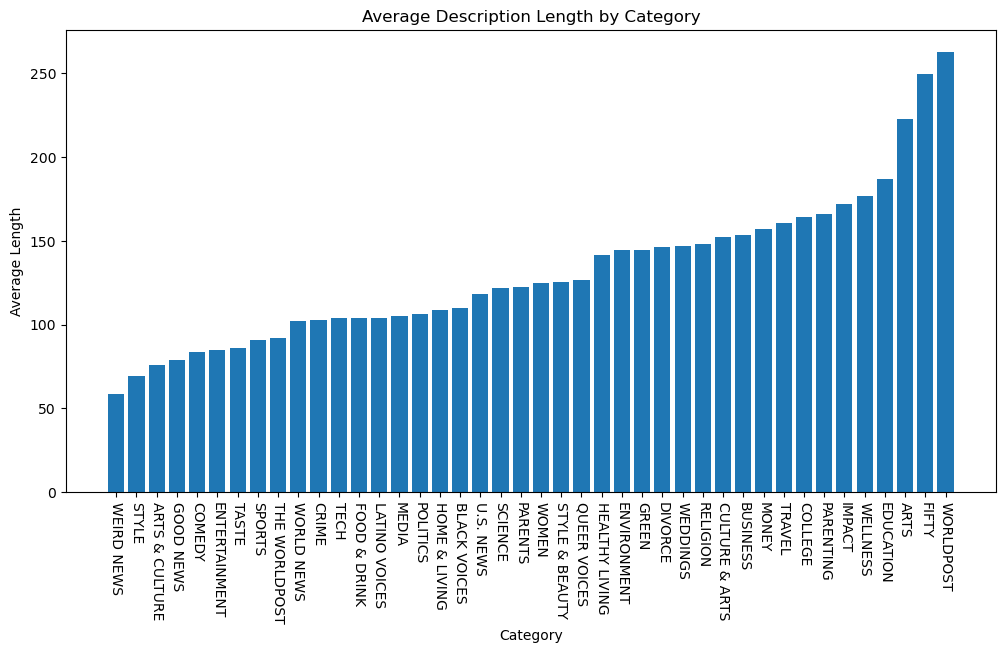

In [18]:
data = data.sort_values()

fig = plt.figure(figsize=(12,6))
plt.bar(range(len(data)), data.values)


plt.xticks(range(len(data)), data.index.values, rotation=-90)

ax = plt.gca()
ax.set_xlabel('Category')
ax.set_ylabel('Average Length')

ax.set_title('Average Description Length by Category')

plt.show()

In [19]:
TOP_4 = ['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL']
df = df[df['category'].isin(TOP_4)].reset_index(drop=True)
df

,headline,category,short_description
0,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv..."
1,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.
2,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...
3,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009..."
4,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu..."
...,...,...,...
74574,The Benefits of Caring for a Pet,WELLNESS,"For the young as well as the old, especially i..."
74575,Tea Time Beneath The Western Ghats (PHOTOS),TRAVEL,"As we stepped out of the serene plantation, we..."
74576,This Is Only the Beginning: Surprising Advice ...,WELLNESS,"My great-aunt Ida loves to say, ""This is only ..."
74577,"Sundance, Ice-T, and Shades of the American Ra...",ENTERTAINMENT,Representation of the collective diaspora has ...


In [20]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns='category'), df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_test_copy = X_test.copy()

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

clf1 = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('clf', SGDClassifier()),
])
clf2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])

In [24]:
v = CountVectorizer()
X = v.fit_transform(X_train['short_description'])
X.shape

(59663, 43228)

In [25]:
from sklearn.metrics import classification_report

In [26]:
clf1.fit(X_train['headline'], le.fit_transform(y_train))
pred = clf1.predict(X_test['headline'])
print(classification_report(y_test, le.inverse_transform(pred)))

               precision    recall  f1-score   support

ENTERTAINMENT       0.93      0.85      0.89      3020
     POLITICS       0.94      0.94      0.94      6501
       TRAVEL       0.90      0.84      0.87      1859
     WELLNESS       0.85      0.94      0.89      3536

     accuracy                           0.91     14916
    macro avg       0.91      0.89      0.90     14916
 weighted avg       0.91      0.91      0.91     14916



In [27]:
clf2.fit(X_train['headline'], le.fit_transform(y_train))
pred = clf2.predict(X_test['headline'])
print(classification_report(y_test, le.inverse_transform(pred)))

               precision    recall  f1-score   support

ENTERTAINMENT       0.88      0.85      0.86      3020
     POLITICS       0.91      0.94      0.92      6501
       TRAVEL       0.88      0.82      0.85      1859
     WELLNESS       0.88      0.89      0.89      3536

     accuracy                           0.89     14916
    macro avg       0.89      0.87      0.88     14916
 weighted avg       0.89      0.89      0.89     14916



In [28]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[
    ('clf1', clf1),
    ('clf2', clf2),
])

eclf1.fit(X_train['headline'], le.fit_transform(y_train))

VotingClassifier(estimators=[('clf1',
                              Pipeline(steps=[('vect',
                                               CountVectorizer(ngram_range=(1,
                                                                            2))),
                                              ('clf', SGDClassifier())])),
                             ('clf2',
                              Pipeline(steps=[('vect', CountVectorizer()),
                                              ('clf', MultinomialNB())]))])

In [29]:
pred = eclf1.predict(X_test['headline'])
print(classification_report(y_test, le.inverse_transform(pred)))

               precision    recall  f1-score   support

ENTERTAINMENT       0.87      0.90      0.88      3020
     POLITICS       0.92      0.95      0.93      6501
       TRAVEL       0.89      0.84      0.86      1859
     WELLNESS       0.92      0.87      0.90      3536

     accuracy                           0.91     14916
    macro avg       0.90      0.89      0.89     14916
 weighted avg       0.91      0.91      0.91     14916



In [30]:
from sklearn.ensemble import StackingClassifier

sclf1 = StackingClassifier(estimators=[
    ('clf1', clf1),
    ('clf2', clf2),
])

sclf1.fit(X_train['headline'], le.fit_transform(y_train))

StackingClassifier(estimators=[('clf1',
                                Pipeline(steps=[('vect',
                                                 CountVectorizer(ngram_range=(1,
                                                                              2))),
                                                ('clf', SGDClassifier())])),
                               ('clf2',
                                Pipeline(steps=[('vect', CountVectorizer()),
                                                ('clf', MultinomialNB())]))])

In [31]:
pred = sclf1.predict(X_test['headline'])
print(classification_report(y_test, le.inverse_transform(pred)))

               precision    recall  f1-score   support

ENTERTAINMENT       0.92      0.88      0.90      3020
     POLITICS       0.94      0.94      0.94      6501
       TRAVEL       0.88      0.87      0.88      1859
     WELLNESS       0.89      0.92      0.91      3536

     accuracy                           0.92     14916
    macro avg       0.91      0.90      0.91     14916
 weighted avg       0.92      0.92      0.92     14916



In [32]:
clf3 = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('clf', SGDClassifier()),
])
clf4 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])

In [33]:
clf3.fit(X_train['short_description'], le.fit_transform(y_train))
pred = clf3.predict(X_test['short_description'])
print(classification_report(y_test, le.inverse_transform(pred)))

               precision    recall  f1-score   support

ENTERTAINMENT       0.72      0.75      0.73      3020
     POLITICS       0.85      0.88      0.86      6501
       TRAVEL       0.84      0.71      0.77      1859
     WELLNESS       0.87      0.84      0.86      3536

     accuracy                           0.82     14916
    macro avg       0.82      0.80      0.81     14916
 weighted avg       0.83      0.82      0.82     14916



In [34]:
clf4.fit(X_train['short_description'], le.fit_transform(y_train))
pred = clf4.predict(X_test['short_description'])
print(classification_report(y_test, le.inverse_transform(pred)))

               precision    recall  f1-score   support

ENTERTAINMENT       0.82      0.61      0.70      3020
     POLITICS       0.87      0.87      0.87      6501
       TRAVEL       0.79      0.74      0.76      1859
     WELLNESS       0.71      0.89      0.79      3536

     accuracy                           0.81     14916
    macro avg       0.80      0.78      0.78     14916
 weighted avg       0.81      0.81      0.80     14916



In [35]:
eclf2 = VotingClassifier(estimators=[
    ('clf3', clf3),
    ('clf4', clf4),
])

eclf2.fit(X_train['short_description'], le.fit_transform(y_train))

VotingClassifier(estimators=[('clf3',
                              Pipeline(steps=[('vect',
                                               CountVectorizer(ngram_range=(1,
                                                                            2))),
                                              ('clf', SGDClassifier())])),
                             ('clf4',
                              Pipeline(steps=[('vect', CountVectorizer()),
                                              ('clf', MultinomialNB())]))])

In [36]:
pred = eclf2.predict(X_test['short_description'])
print(classification_report(y_test, le.inverse_transform(pred)))

               precision    recall  f1-score   support

ENTERTAINMENT       0.71      0.80      0.76      3020
     POLITICS       0.85      0.89      0.87      6501
       TRAVEL       0.87      0.70      0.78      1859
     WELLNESS       0.91      0.82      0.86      3536

     accuracy                           0.83     14916
    macro avg       0.83      0.80      0.82     14916
 weighted avg       0.84      0.83      0.83     14916



In [37]:
from sklearn.ensemble import StackingClassifier

sclf2 = StackingClassifier(estimators=[
    ('clf3', clf3),
    ('clf4', clf4),
])

sclf2.fit(X_train['short_description'], le.fit_transform(y_train))

StackingClassifier(estimators=[('clf3',
                                Pipeline(steps=[('vect',
                                                 CountVectorizer(ngram_range=(1,
                                                                              2))),
                                                ('clf', SGDClassifier())])),
                               ('clf4',
                                Pipeline(steps=[('vect', CountVectorizer()),
                                                ('clf', MultinomialNB())]))])

In [38]:
pred = sclf2.predict(X_test['short_description'])
print(classification_report(y_test, le.inverse_transform(pred)))

               precision    recall  f1-score   support

ENTERTAINMENT       0.79      0.73      0.76      3020
     POLITICS       0.87      0.90      0.88      6501
       TRAVEL       0.83      0.77      0.80      1859
     WELLNESS       0.86      0.89      0.87      3536

     accuracy                           0.85     14916
    macro avg       0.84      0.82      0.83     14916
 weighted avg       0.85      0.85      0.85     14916



In [39]:
# combine sclf1 and sclf2

proba1 = sclf1.predict_proba(X_test['headline'])
proba2 = sclf2.predict_proba(X_test['short_description'])

In [40]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_is_fitted
import numpy as np

class FinalEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self, model1, model2):
        self.model1 = model1
        self.model2 = model2
        
    def predict(self, X1, X2):
        check_is_fitted(self.model1)
        check_is_fitted(self.model2)
        
        proba1 = self.model1.predict_proba(X1)
        proba2 = self.model2.predict_proba(X2)
        
        return np.argmax((proba1 + proba2) / 2, axis=1)
            
        

In [41]:
model = FinalEstimator(sclf1, sclf2)
pred = model.predict(X_test['headline'], X_test['short_description'])
# print(classification_report(le.transform(y_test), pred))
print(classification_report(y_test, le.inverse_transform(pred)))

               precision    recall  f1-score   support

ENTERTAINMENT       0.94      0.89      0.91      3020
     POLITICS       0.95      0.97      0.96      6501
       TRAVEL       0.92      0.92      0.92      1859
     WELLNESS       0.93      0.95      0.94      3536

     accuracy                           0.94     14916
    macro avg       0.94      0.93      0.93     14916
 weighted avg       0.94      0.94      0.94     14916



In [42]:
def what_category(text):
    print(le.inverse_transform(model.predict([text], [text]))[0])

In [43]:
what_category('Desantis announces bid for 2024 election')
what_category('The new hit tv show breaking bad is available on hbo')
what_category('The best flight hacks for 2023')
what_category('The Flash. Watch the trailer for The Flash. 89%')

POLITICS
ENTERTAINMENT
TRAVEL
ENTERTAINMENT


In [44]:
pred = le.inverse_transform(pred)
y_test = y_test.to_list()

In [45]:
X_test_copy.reset_index(inplace=True)
X_test_copy['predicted_label'] = ''
X_test_copy['label'] = ''
indices = []
for i in range(len(y_test)):
    if y_test[i] != pred[i]:
        X_test_copy.at[i, 'predicted_label'] = pred[i]
        X_test_copy.at[i, 'label'] = y_test[i]
        indices.append(i)

In [46]:
X_test_copy.iloc[indices,:]

,index,headline,short_description,predicted_label,label
29,72868,Will Cheney's New Heart Make Him Nicer?,Will Dick Cheney's new heart make him a gentle...,POLITICS,WELLNESS
36,68310,5 Tips to Jump Like an Olympic Beach Volleyballer,"Whether you want to dunk a basketball, kill a ...",TRAVEL,WELLNESS
40,31372,Radical New Interrogation Technique Is Transfo...,"One afternoon in January of 2012, a Los Angele...",WELLNESS,POLITICS
88,69332,CPR: How It Helped Save Michael Clarke Duncan ...,"For more on Duncan's condition, click over to ...",POLITICS,WELLNESS
89,24961,Superheroes React To Donald Trump's Presidency...,"They can't believe it, either.",POLITICS,ENTERTAINMENT
...,...,...,...,...,...
14817,62347,Car Survival Tips for a Blizzard,"Every winter, thousands of people are stranded...",TRAVEL,WELLNESS
14848,63746,Celebrity Bad Science: Sense About Science Cam...,"January Jones's dried placenta pills, which th...",ENTERTAINMENT,WELLNESS
14859,29996,Conservatives Have A Problem With Matt Damon's...,Damon said he'd like the U.S. to adopt laws si...,POLITICS,ENTERTAINMENT
14878,11402,E! News Host Ken Baker Accused Of Sexual Haras...,A new report claims he kissed an intern withou...,POLITICS,ENTERTAINMENT
